<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/logo.png?raw=1" width="800">

Made by **Balázs Nagy** and **Márk Domokos**

[<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/open_button.png?raw=1">](https://colab.research.google.com/github/Fortuz/edu_Adaptive/blob/main/practices/L11%20-%20K-Means_solved.ipynb)

# Labor 11 - K-Means clastering


### 0: Background
The main groups of machine learning algorithms are illustrated in the figure below, one of the main groups being unsupervised learning algorithms.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab11/Pics/L11_groups.png?raw=1" width="800">

During our previous labs, we became thoroughly acquainted with supervised learning and its applications, such as classification and regression. In this exercise, the focus will be on unsupervised learning, specifically clustering.

When might unsupervised learning be necessary?
For example, in cases where we do not know the output but are looking for some kind of pattern in our data. This could include analyzing or segmenting market participants or studying social network connections.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab11/Pics/L11_example.png?raw=1" width="800">

The aim may be to identify small cohesive groups, also known as clusters. One possible solution is to use the K-means algorithm.

### 1: Import packages

The initial data will be 2D point cloud.

In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### 2: Data load

First tha data will be downloaded.

In [2]:
!wget https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab11/Lab11data.mat
!wget https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab11/bird_small.mat

--2025-01-11 11:50:27--  https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab11/Lab11data.mat
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Fortuz/edu_Adaptive/main/practices/assets/Lab11/Lab11data.mat [following]
--2025-01-11 11:50:27--  https://raw.githubusercontent.com/Fortuz/edu_Adaptive/main/practices/assets/Lab11/Lab11data.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4784 (4.7K) [application/octet-stream]
Saving to: ‘Lab11data.mat’

Lab11data.mat       100%[===================>]   4.67K  --.-KB/s    in 0s      

2025-01-11 11:50:27 (86.5 MB/s) - ‘Lab11data.mat’ sav

After the data is donloaded to the local workspace it can be loaded into the notebbok.

X shape: (300, 2)


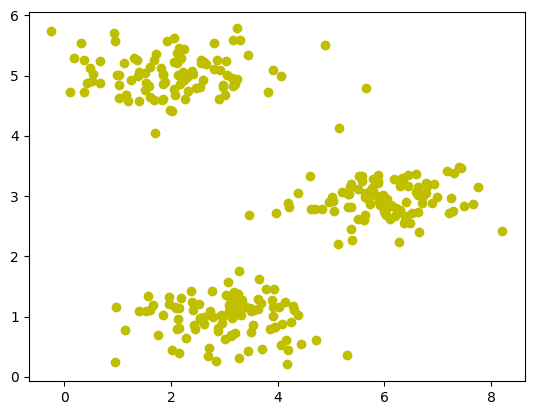

In [3]:
data = loadmat("Lab11data.mat")
X = data["X"]
plt.plot(X[:,0],X[:,1], 'yo')
print('X shape:',X.shape)

### 3: Clustering

At first we would say that the data can be classified into 3 clusters according to the structure that can be discovered in the data set. In terms of how the K-Means algorithm works, we need to determine the number of possible clusters. So let us make this 3.

The initial cluster midpoints can be defined either explicitly or randomly.
Furthermore, they can be points chosen from the sample or even starting points not included in the sample set.

What should be observed is that the number K (as number of clusters should be less than the sample number)

In our palette we have predefined the coordinates of the 3 starting cluster centres.

Initial cluster centroids:
 [[3 3]
 [6 2]
 [8 5]]


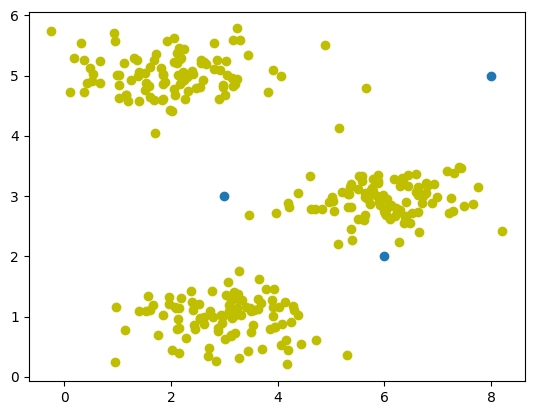

In [4]:
K = 3                                                           # Number of clusters
init_centroids = np.array([[3,3],[6,2],[8,5]])                  # Initial cluster middle points
print('Initial cluster centroids:\n',init_centroids)

plt.plot(X[:,0],X[:,1], 'yo')
plt.plot(init_centroids[:,0],init_centroids[:,1], 'o')

The next step is to decide for each point in the sample set which cluster it belongs to, i.e. which cluster centre it is closest to.

### 4: Find the closest cluster centroid

Write the following function that assigns to each point the index of the nearest cluster centre.

The distance between two points can be calculated using the Pythagorean theorem. <br>
Let the two points be $P_1(x_1, y_1)$ és $P_2(x_2, y_2)$.

The distance can be calculated as follows: <br>

$d = \sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$ <br>

For the purposes of comparison, the root can be omitted and $d^2$ can be used.

In [ ]:
def findClosestCentroids(X,centroids):
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0],1))
    ################### CODE HERE ########################
    # Find the closest centroid for each data point.



    





    #####################################################
    return idx

idx = findClosestCentroids(X,init_centroids)
print('Closest centroids for the first 3 examples (expected: 0-2-1):\n',idx[0:3])

### 5: Centroid calculation

Once we have classified all points into a cluster, we need to review the new cluster centres. We need to recalculate the centroid of the clusters taking into account the points that were clustered. This will step the cluster midpoints.

In [ ]:
def computeCentroids(X,idx,K):

    m,n = X.shape
    centroids = np.zeros((K,n))
    cent = []

    ################### CODE HERE ########################
    # Calculate the new cetroinds.








    #####################################################
    return centroids

centroids = computeCentroids(X,idx,K)
print("""Centroids computed after initial finding of closest centroids:
(expected values):
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
 Computed:
 """, centroids)

### 6: K-Means clustering

The steps of the K-means algorithm (clustering of points, stepping of centres) are then run until a stopping condition is reached. This condition can be that the midpoints no longer change, or the change stays within a specified small interval, or the algorithm is run up to a prescribed iteration. In this example, we have chosen the latter solution and will run the algorithm for 5 iterations.

In [ ]:
def plotkMeans(idx,num_CL,C_H,it):
    colors = ('b','g','r','c','m','y','k')

    plt.figure
    for i in range(num_CL):
        CL_i = X[np.where(idx == i)[0],:]
        plt.plot(CL_i[:,0],CL_i[:,1], colors[i]+'o',)
        plt.plot(C_H[i,0,0:it+2],C_H[i,1,0:it+2],'kx-')

    plt.show()
    return 0

def runkMeans(X,init_cents,max_iters,plotProgress= False):

    m, n = X.shape
    k = init_cents.shape[0]
    idx = np.zeros((m))
    centroids = init_cents
    cent_hist = np.zeros((init_cents.shape[0],init_cents.shape[1],max_iters+1))
    cent_hist[:,:,0] = init_cents

    # K-Means:
    for i in range(max_iters):

        print('Running the {} iteration of {}'.format(i+1,max_iters))
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, k)
        cent_hist[:,:,i+1] = centroids
        if plotProgress:
            plotkMeans(idx,init_cents.shape[0],cent_hist,i)

    return centroids, idx

K = 5
max_iters = 5
init_cents = np.array([[3,3],[6,2],[8,5]])

centroids, idx = runkMeans(X,init_cents,max_iters,True)
print("""Centroids computed by the algorithm:
Expected:
[[1.95399466 5.02557006]
 [3.12663743 1.1121712 ]
 [6.12919526 3.01606258]]
Computed:
""",centroids)

print('Centroids movements')

We can see how our initial cluster centres migrated to their final location over the 5 iterations, and how the sample classification of the dataset changed accordingly.

### 7: Problems

Depending on the choice of cluster centers (especially in the case of random initialization), the algorithm will arrive at different optimal positions. Furthermore, it can easily get stuck in a local optimum if poorly distributed cluster centres are chosen.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab11/Pics/L11_Localopt.png?raw=1" width="500">

Another important question is how to choose the value of K (number of clusters). <br>
This is mostly done intuitively. In well-separable cases, a so-called elbow rule can be used to compare the results of several runs. This determines the point beyond which, by choosing a larger number of clusters, there is no longer a significant decrease in the cost function (here the cost function is the sum of the distances between the points and the cluster centres).

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab11/Pics/L11_Elbow.png?raw=1" width="800">

Of course, there are cases where the elbow rule does not apply. For example, when we want to separate a data set with an approximately linear distribution. In this case, again, it is up to us to decide at what level of detail we want to partition the scale.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab11/Pics/L11_Size.png?raw=1" width="800">

### 8: K-Means clustering on pixels

Finally, an extra example of using K-means. In the following example, the colours of an image are selected and compressed using the K-Means algorithm. The example is entirely a toy example, in reality there are much better algorithms for this task.

In [ ]:
def kMeansInitCentroids(X,K):
    cents = np.zeros((K,X.shape[1]))
    randindx = np.random.permutation(X.shape[0])
    cents = X[randindx[0:K],:]

    return cents


image = loadmat("bird_small.mat")
A_o = image['A']
A = A_o / 255.
img_size = A.shape
print(img_size)
plt.imshow(A)

X2 = A.reshape((int(A.size/3),3))

K =2
max_iters = 5
init_cents = kMeansInitCentroids(X2,K)
print('Initial Centroids:\n',init_cents)
centroids, idx = runkMeans(X2,init_cents,max_iters)
print('K-Means clustering done...')

### 9: Image compression

In [ ]:
idx = findClosestCentroids(X2,centroids)

X_recovered = centroids[idx.astype(int),:]
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
plt.imshow(X_recovered)
plt.show()

<div style="text-align: right">This lab exercise uses elements from Andrew Ng's Machine Learning course.</div>